<a href="https://colab.research.google.com/github/nJuleigh/TIL/blob/main/1_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이제부터 이틀 동안 간단한 이미지 인식 및 생성을 하는 인공 신경망을 직접 구현해볼 것이다. 이를 위해, 이 수업에서는 [tensorflow](https://www.tensorflow.org/?hl=ko)를 사용할 것이다. 또 다른 선택지로는 [PyTorch](https://pytorch.org/)가 있다. 일반적으로 성능 측면에서 둘의 차이는 거의 없으나 (물론, 연구 레벨로 가면 PyTorch 쪽이 좀 더 성능이 뛰어나다고 알려져 있으며, 따라서 인공지능 연구에는 PyTorch 쪽이 많이 쓰이긴 한다), tensorflow 쪽이 좀 더 배우기가 어렵다고 알려져 **있었다**.

하지만, tensorflow의 기능들을 보다 쓰기 쉽게 만든 고수준 API인 [Keras](https://keras.io/)가 tensorflow에 탑재되면서 두 라이브러리 중 하나를 선택하는 건 취향에 가까워졌고, 실제로 배우는 측면에서는 Keras가 훨씬 간단하다. 이 강의에서는 Keras를 기준으로 모든 걸 진행하겠다.

# Copy Colab

먼저, 이 Colab 파일을 개인의 구글 드라이브로 복사하자. 다음 그림처럼 **파일-Drive에 사본 저장**을 누르면 된다.

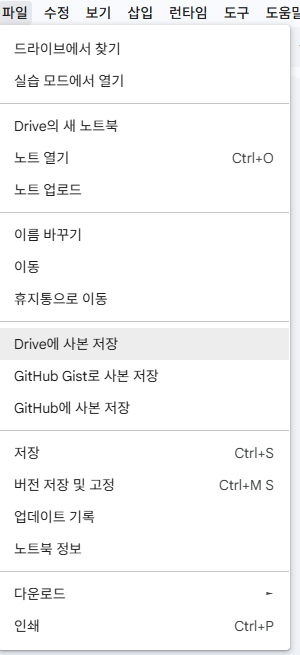

# Installing Libraries

먼저, 다음과 같이 tensorflow를 포함한 라이브러리를 설치하자. Colab의 코드를 실행하기 위해서는 해당 부분에 포커스를 맞추고 (클릭 혹은 방향키 등으로 선택될 시 파란색 윤곽선으로 표시됨) **Ctrl + Enter**를 누르면 된다.

In [1]:
%pip install -q numpy matplotlib tensorflow

# Introduction to Artificial Neural Network

## Biological Neural Network vs. Artificial Neural Network


본격적으로 실습하기에 앞서, 인공 신경망의 간단한 이론적 배경부터 한번 훑어보자.

인공 신경망을 이야기하려면, 생물의 신경망에 대해 먼저 알아야 한다:


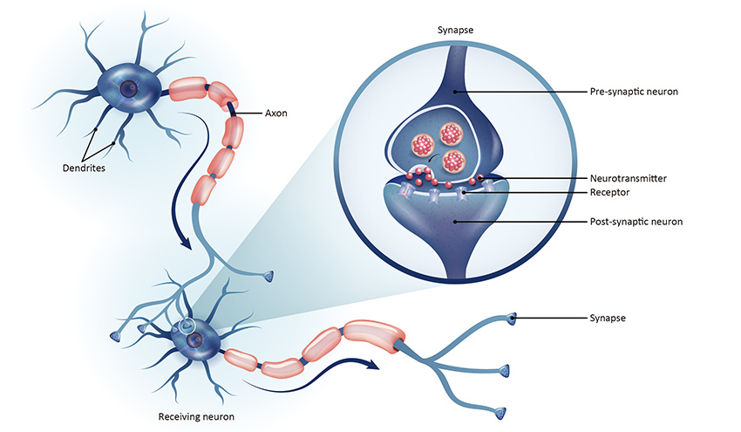


- 수없이 많은 <font color="red">**신경 세포Neuron**</font>가 수없이 많은 <font color="blue">**연접Synapse을 통해 연결**</font>되어 있는 구조
- 한 신경 세포로 들어온 전기적 신호는 <font color="darkviolet">**그 강도가 임계치Threshold를 넘으면 해당 전기적 신호**</font>를 연결된 다른 신경 세포로 전달
- 한 신경 세포가 다른 신경 세포와 강한 관련이 있으면 <font color="fuchsia">**접합 강도Synaptic Strength**</font>가 증가하여, 해당 신경 세포로부터 전달받는 전기적 신호가 강해짐


인공 신경망은 이러한 생물의 신경망을 거의 그대로 모방한 것이다:
- 수없이 많은 <font color="red">**인공적인 신경 세포(=퍼셉트론Perceptron\)** </font>가 수없이 많이 <font color="blue">**연결** </font>되어 있는 구조
- 한 퍼셉트론으로 들어온 입력은 <font color="darkviolet">**활성 함수Activation Function을 통해 변환**</font>되어 연결된 다른 퍼셉트론으로 전달
- 한 퍼셉트론이 다른 퍼셉트론과 강한 관련이 있으면 <font color="fuchsia">**가중치Weight**</font>가 증가하여, 해당 퍼셉트론으로부터 전달받는 입력이 커짐

## Perceptron

그렇다면, 인공 신경망의 퍼셉트론은 어떻게 생겼을까? 다음 그림을 보자.

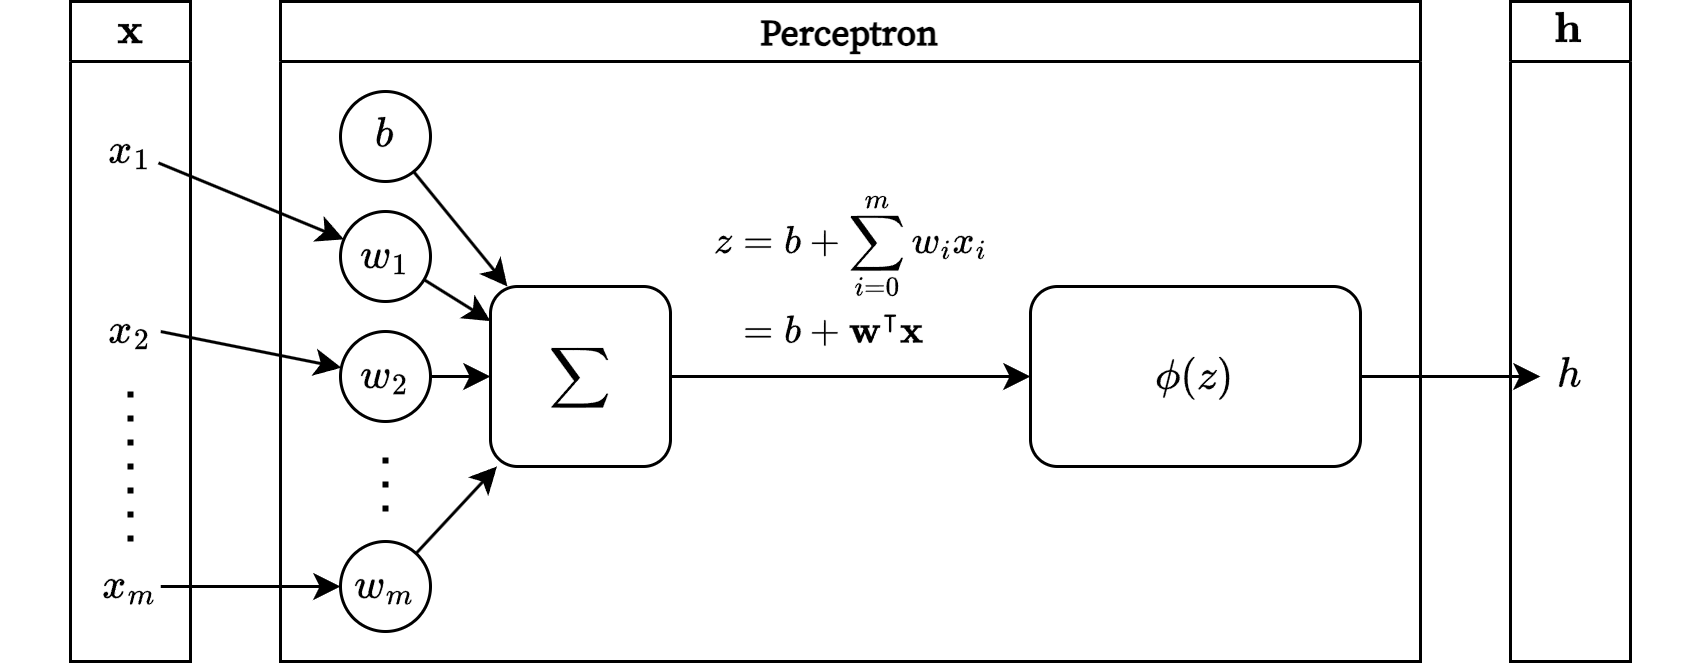

- $m$차원 벡터 입력 $\mathbf{x} = \begin{bmatrix} x_1 & x_2 & \cdots & x_m \end{bmatrix}^\intercal$
- $m$차원 벡터 가중치 $\mathbf{w} = \begin{bmatrix} w_1 & w_2 & \cdots & w_m \end{bmatrix}^\intercal$
- **스칼라 편차** Bias $b$
- 가중 입력합Weighted Sum of Inputs $ z = b + \mathbf{w}^\intercal \mathbf{x}$
- 가중 입력합 $z$을 입력으로 삼아 출력을 내는 활성 함수 $\phi(\cdot)$
- 스칼라 출력 $h = \phi(z) $

선형 모델Linear Model이 뭔지를 알고 있다면 퍼셉트론이 얼마나 단순한 구조인지 알 수 있을 것이다. 선형 모델의 출력을 활성 함수에 통과시킨 것이 바로 퍼셉트론이기 때문이다.

그럼, 위와 같은 간단한 퍼셉트론을 직접 만들어보자.

먼저 해야할 것은 인공 신경망 모델을 정의하는 것이다. 다음처럼 [keras.models.Sequential](https://keras.io/api/models/sequential/) 클래스를 통해 모델을 선언하자.

In [1]:
from tensorflow import keras


model = keras.models.Sequential()

이 모델의 입력으로 3차원 벡터를 받도록 해보겠다. 이를 위해서는, 입력의 형태를 정의하는 [keras.layers.Input](https://keras.io/api/layers/core_layers/input/)을 모델에 먼저 추가해야 한다.

In [2]:
from tensorflow import keras


model.add(
    keras.layers.Input(
        shape=(3, ) # 입력의 차원으로, 항상 Tuple 형식으로 정의되어야 함; 여기선 3차원 입력을 설정
    )
)

다음은 [keras.layers.Dense](https://keras.io/api/layers/core_layers/dense/)를 추가하자.

In [3]:
from tensorflow import keras


model.add(
    keras.layers.Dense(
        units=1
    )
)

위에서 *units* 라는 인자에 *1*이라는 값이 지정된 것을 볼 수 있는데, 일단은 넘어가도록 하자.

놀랍게도, 이렇게 하면 이미 퍼셉트론이 완성되었다. 다음처럼, 생성한 모델을 요약하는 함수를 실행해보자.

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

위의 모델 요약이 의미하는 바는 다음과 같다:
* Total params: 매개변수 (= 가중치 + 편차)의 총 갯수를 의미
* Trainable params: 학습되어야 하는 매개변수의 총 갯수를 의미
* Non-trainable params: 학습되지 않아도 되는 매개변수의 총 갯수를 의미

학습된다, 안해도 된다는 일단 넘어가도록 하고, 매개변수의 총 갯수가 4개인 것을 알 수 있다. 왜 그럴까? 우린 입력으로 3차원 벡터를 받았다. 그렇다면, 가중치 또한 3차원 벡터이므로 총 3개가 된다. 거기다가 편차가 하나 있으므로 총 4개가 되는 것이다.

또 확인해야할 것이 출력 형태Output Shape이다. *(None, 1\)* 로 되어 있는데, 일단 맨 앞의 *None*은 무시하자. 그럼 *1*만 남는데, 이 퍼셉트론을 통과했을 때 나오는 출력의 차원 수를 의미한다. 3차원 입력의 가중 입력합을 활성 함수에 통과시켜서 값이 하나가 나오므로 1차원인 것이다.

또한, 이렇게 일일이 [keras.models.Sequential.add](https://keras.io/api/models/sequential/#add-method)를 사용하는 대신, 다음처럼 모델을 선언할 때 한번에 정의할 수도 있다:

In [5]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Input(
        shape=(3, )
    ),
    keras.layers.Dense(
        units=1
    )
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

## Activation Function

자, 그럼 활성 함수에 대해서 알아보자.

앞서서, 한 신경 세포로 들어온 전기적 신호의 강도가 임계치를 넘으면 다른 신경 세포로 해당 신호를 전달한다고 언급한 바 있다. 바로 다음처럼 말이다:

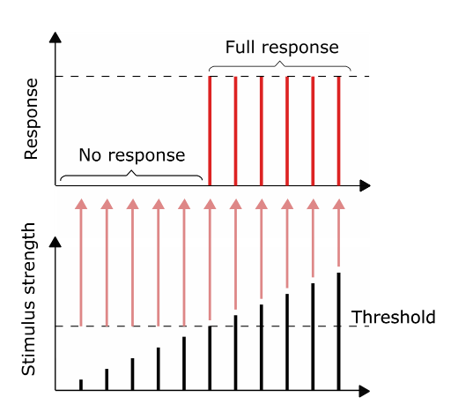

활성 함수는 **임계치에 대한 신경 세포의 반응을 흉내**내는 함수라고 보면 된다. (x-axis: weighted sum of inputs z=b+w.x , y-axis: 다음 perceptron으로 보낼 신호의 세기)

모든 활성 함수가 그런 것은 아니지만, 대부분의 활성 함수는 연속이고Continuous, 단조 증가하며Monotonically Increasing, 미분 가능Differentiable한 것이 특징이다. 대표적인 활성 함수들은 아래와 같다:

|Name|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Equation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Range&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Plot|
| :--: | :-------: |----|------|
|identity (or linear)|$\phi(z) = z$|$(-\infty, \infty)$|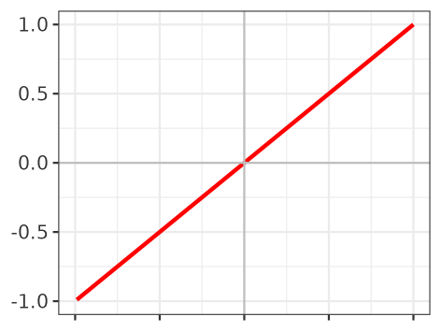|
|Rectifier Linear Unit (ReLU)|$\phi(z) = \begin{cases}0 & \text{if } z \lt 0\\z & \text{if } z \ge 0\end{cases}$|$[0, \infty)$|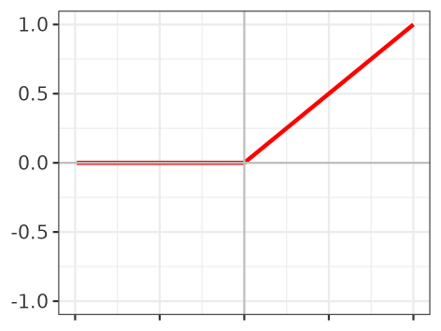|
|sigmoid|$\begin{aligned}\phi(z) = \frac{1}{1 + e^{-z}}\end{aligned}$|$(0, 1)$|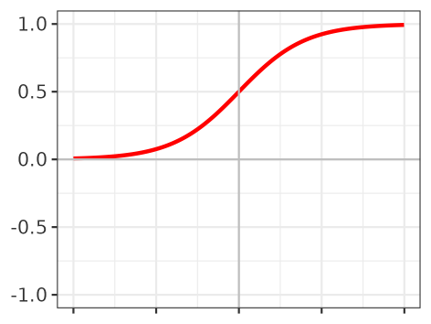|
|tanh|$\begin{aligned}\phi(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}\end{aligned}$|$(-1, 1)$|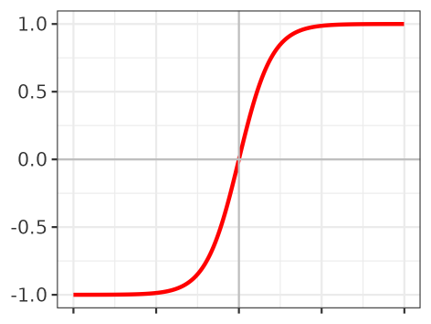|
softplus|$\phi(z) = \ln\left(1 + e^z\right)$|$(0, \infty)$|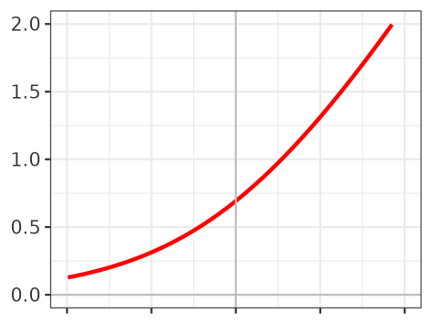|

그럼, 이처럼 다양한 활성 함수를 실제로 어떻게 쓸 수 있을까? 간단하다. [keras.layers.Dense](https://keras.io/api/layers/core_layers/dense/)의 *activation* 인자를 [keras.activations](https://keras.io/api/layers/activations/) 패키지 내에 구현된 활성 함수 중 하나로 지정하면 된다:
* identity: [keras.activations.linear](https://keras.io/api/layers/activations/#linear-function)
* ReLU: [keras.activations.relu](https://keras.io/api/layers/activations/#relu-function) : (# 현대 AI의 표준. 0보다 작으면 무시하고, 0을 넘어서는 순간부터는 "자극이 강할수록 나도 강하게 반응하겠다"라며 선형적으로 출력함. #differential이 1로 constant이므로 역전파 시 신호가 약해지지 않고 지속됨)
* sigmoid: [keras.activations.sigmoid](https://keras.io/api/layers/activations/#sigmoid-function) 부드러운 전이. "이쯤 되면 활성화된 걸로 봐도 되지 않을까?" 하고 0과 1 사이를 유연하게 연결함.
* tanh: [keras.activations.tanh](https://keras.io/api/layers/activations/#tanh-function)
* softplus: [keras.activations.softplus](https://keras.io/api/layers/activations/#softplus-function)

예를 들어, 위에서 만들었던 퍼셉트론을 ReLU를 활성 함수로 사용하도록 해보자:

In [6]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Input(
        shape=(3, )
    ),
    keras.layers.Dense(
        units=1,
        activation=keras.activations.relu # 활성 함수 지정
    )
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

## Layer

이제, 퍼셉트론이 뭔지는 알았으니 레이어에 대해 알아볼 차례다. 레이어는 간단히 말해, 여러 개의 퍼셉트론이 ''**병렬적, 독립적**''으로 연결된 구조다. 다음 그림과 같이 말이다.





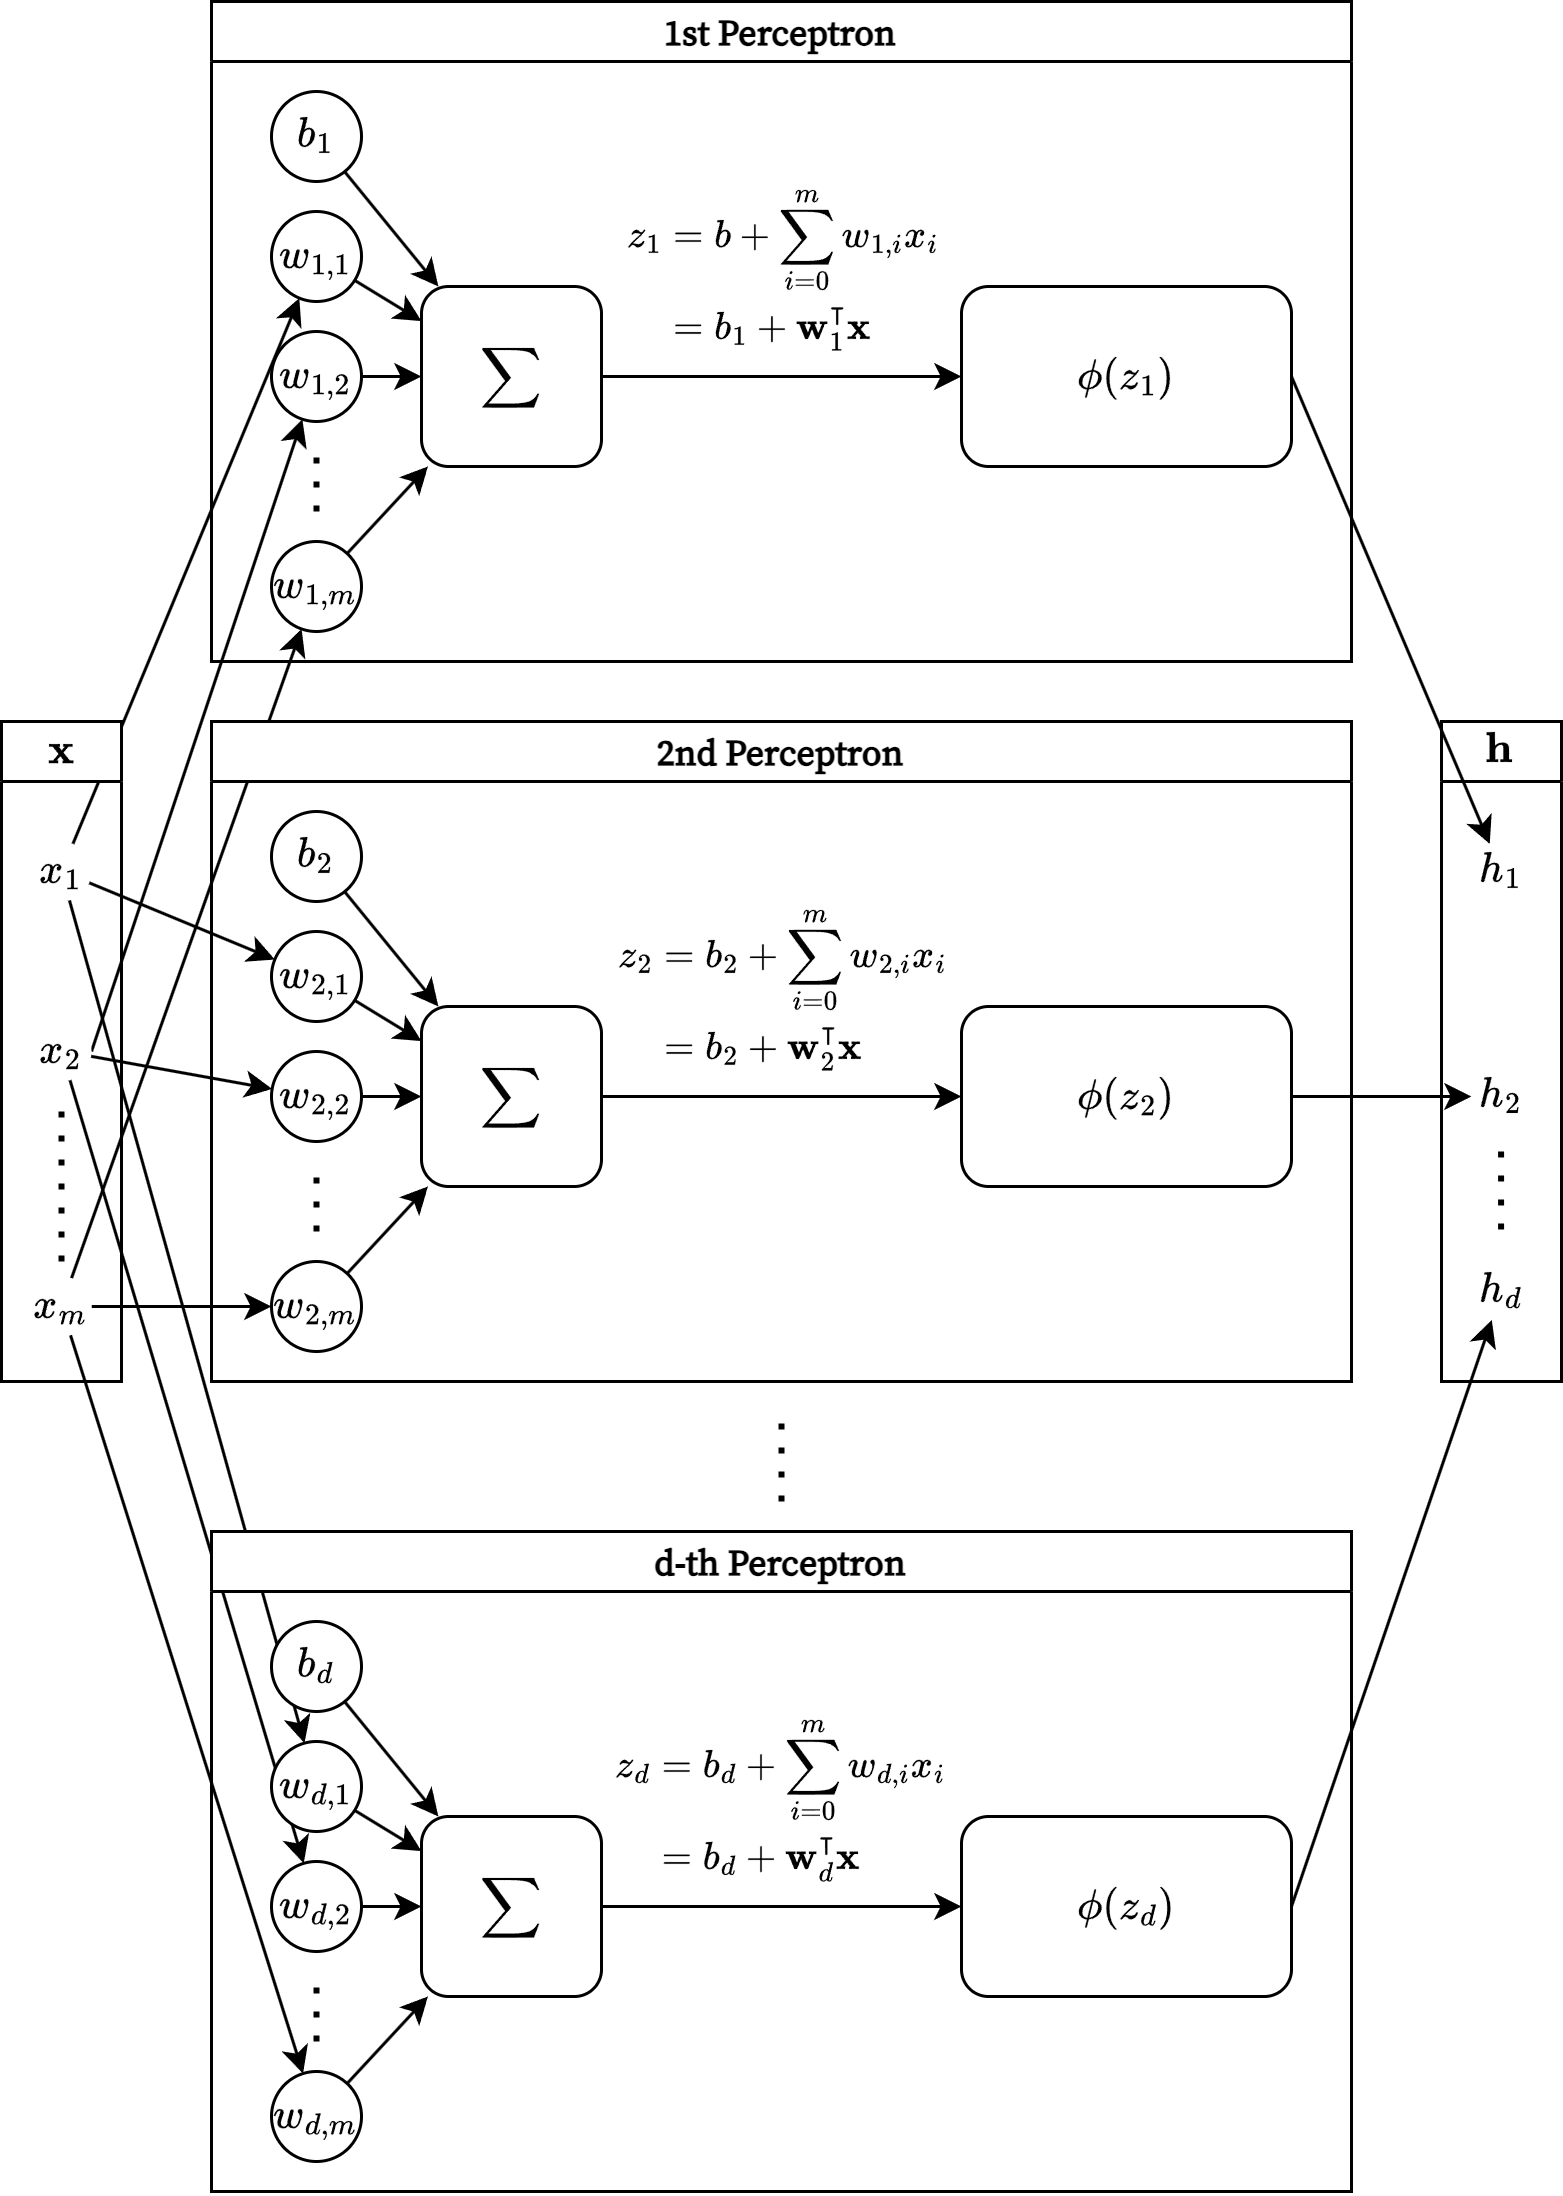

위의 그림에서는 $m$차원 입력이 $d$개의 퍼셉트론으로 각각 들어가게 된다. 각 퍼셉트론은 각자 가중치와 편차를 갖고 있으며, 각각 가중 입력합을 계산한 후 활성 함수에 통과시켜 출력을 내게 된다. $d$개의 퍼셉트론이 각각 출력을 내니까 $d$차원 출력이 되는 것이다.

좀 더 어렵게 말하자면, 레이어가 하는 역할은 $m$차원 입력을 $d$차원 출력으로 변환하는 것이다. 보통, 기계 학습 및 딥 러닝 등에서 **다른 차원으로 변환**한다는 것은 **학습 모델이 잘 인지할 수 있는 원본 데이터의 중요한 패턴 등을 알아내는 것**과 거의 동일하다고 보면 된다.

그럼, 이런 레이어를 어떻게 만들 수 있을까? 너무 간단하다. 앞서, [keras.layers.Dense](https://keras.io/api/layers/core_layers/dense/)의 *units* 인자를 *1*로 지정해준 것을 기억하고 있을 것이다. 여러 개의 퍼셉트론이 병렬적으로 연결된 레이어를 만들고 싶다면 *units*를 자기가 원하는 갯수만큼 바꿔주면 된다. 예를 들어, 10개의 퍼셉트론을 가지는 레이어를 만들고 싶다면, 다음처럼 *units*에 *10*을 집어넣으면 된다는 것이다:

In [7]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Input(
        shape=(3, )
    ),
    keras.layers.Dense(
        units=10, # 10개의 퍼셉트론을 가지는 레이어
        activation=keras.activations.relu
    )
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

매개변수의 수가 이전처럼 4개가 아니라 40개가 된 것을 알 수가 있다. 왜 그럴까?
* 가중치: 3차원 벡터 입력에 대응되는 3차원 벡터 가중치이므로 3개 X 퍼셉트론의 갯수 10개 = 30개
* 편차: 스칼라 편차 1개 X 퍼셉트론의 개수 10개 = 10개

또한, 이 레이어의 출력은 퍼셉트론의 개수와 같은 10차원 벡터가 된 것을 *Output Shape*에서 알 수 있다.

## Multi-Layered Perceptrons (MLP)

그럼, 이번에는 이런 레이어들을 직렬적, 순차적으로 연결시키면 어떻게 될까?

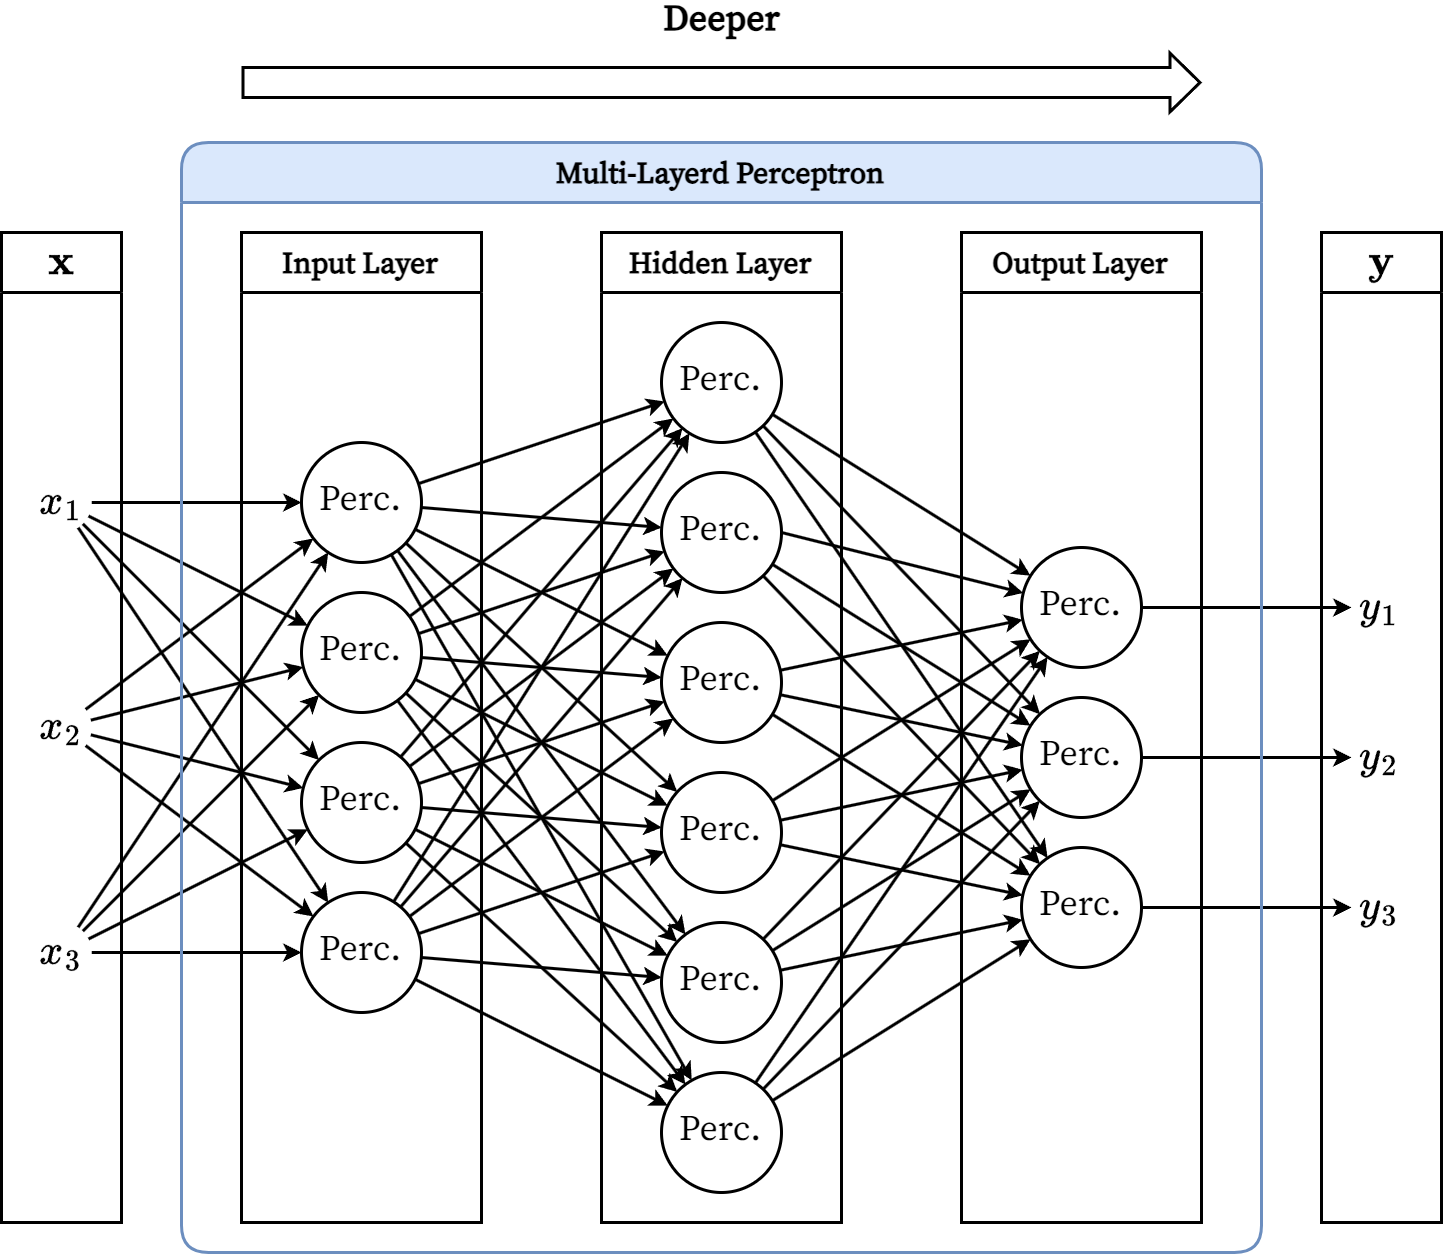

이처럼, 입력, 잠재, 출력 레이어가 순차적으로 연결된 구조를 Multi-Layered Perceptron이라고 하며, 이게 바로 이 강의에서 가르치는 가장 기초적인 **인공 신경망**이다.

특징으로는, 한 레이어로부터 나온 출력이 다음 레이어에 존재하는 모든 퍼셉트론의 입력으로 사용된다는 것이다. 이런 레이어를 **완전 연결 레이어Fully-Connected Layer** 또는 **밀집 레이어Dense Layer**라고 한다. 앞서 우리가 추가했던 레이어인 [keras.layers.Dense](https://keras.io/api/layers/core_layers/dense/)가 바로 완전 연결 레이어인 것이다.

또한, 앞서서 레이어가 하는 역할이 원본 데이터의 중요한 패턴을 알아내는 것이라고 했다. 레이어가 하나가 있을 때보다 세 개가 있다면? 당연히, 중요한 패턴을 더욱 더 잘 알아낼 수 있고, 나아가서는 복잡하고 숨겨진 패턴을 잘 알아낼 수 있게 된다.

마지막으로, 출력 레이어에 가까울 수록 **깊은Deeper** 레이어라고 한다.

그럼, 위와 같은 인공 신경망을 한번 직접 만들어보자. 간단하다. 다음처럼, 그냥 레이어를 차례대로 추가하기만 하면 된다.

In [8]:
from tensorflow import keras


model = keras.models.Sequential([
    # 3차원 벡터 입력
    keras.layers.Input(
        shape=(3, )
    ),
    # 4개의 퍼셉트론으로 구성된 입력 레이어
    keras.layers.Dense(
        units=4,
        activation=keras.activations.relu
    ),
    # 6개의 퍼셉트론으로 구성된 잠재 레이어
    keras.layers.Dense(
        units=6,
        activation=keras.activations.relu
    ),
    # 3개의 퍼셉트론으로 구성된 출력 레이어
    keras.layers.Dense(
        units=3,
        activation=keras.activations.relu
    )
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

위 모델의 매개변수는 총 67개이다. 왜일까?
* 입력 레이어: 16개
  * 가중치: 3차원 입력 벡터에 대응되는 3차원 가중치 X 4개 퍼셉트론 = 12개
  * 편차: 1개 X 4개 퍼셉트론 = 4개
* 잠재 레이어: 30개
  * 가중치: 4개의 퍼셉트론으로 구성된 이전 레이어 (= 입력 레이어)에서 4차원 출력이 잠재 레이어의 입력으로 활용되므로 4차원 가중치 X 6개 퍼셉트론 = 24개
  * 편차: 1개 X 6개 퍼셉트론 = 6개
* 출력 레이어: 21개
  * 가중치: 6개의 퍼셉트론으로 구성된 이전 레이어 (= 잠재 레이어)에서 6차원 출력이 잠재 레이어의 입력으로 활용되므로 6차원 가중치 X 3개 퍼셉트론 = 18개
  * 편차: 1개 X 3개 퍼셉트론 = 3개


## **Gradient Descent**

그럼, 이런 인공 신경망을 어떻게 **훈련**시킬 수 있을까? 여기서 **훈련**이라고 함은, 주어진 입력에 대해서 우리가 원하는 참인 출력 (= 레이블Label)을 내도록 **매개변수의 값을 변화**시키는 것이라고 생각하면 된다. 즉, **가중치와 편차를 적절히 잘 조정하는 것이다.**

일단, 인공 신경망 전체를 보는 대신, 퍼셉트론 하나 하나만 집중해보자. 퍼셉트론을 훈련시키는 대표적인 방법 (그리고, 기계 학습 분야를 포함한 대량의 데이터에 대한 최적화 문제에서 활용되는 방법)이 바로 *반복적으로Iterative 매개변수를 업데이트하는* **경사 하강법Gradient Descent**이다.

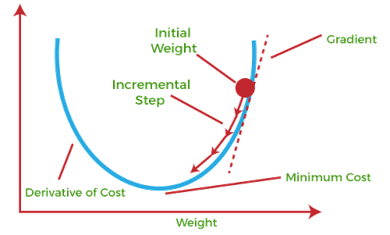

### **Loss Function**

경사 하강법을 적용하기 위해서는, (1) **미분 가능Differentiable**하고, (2) **매개변수 (= 가중치 + 편차)** $\mathbf{w}$ **에 대한 함수**이며, (3) 우리의 모델이 주어진 입력에 대해서 우리가 원하는 출력을 잘 내고 있는지를 **정량적으로 측정**할 수 있는 **손실 함수Loss Function (또는, 목적 함수Objective Function, 비용 함수Cost Function\)** 를 정의해야 한다.

대표적인 손실 함수로는 **Mean Squared Error**와 **Logistic Loss**가 있다. Mean Squared Error의 경우 원하는 *출력값이 연속적인 과업 (= 회귀Regression)*에서 활용된다:
$$
J(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^N \big[ y_i - f(\mathbf{x}_i; \mathbf{w}) \big] ^2
$$
여기서, $N$은 데이터의 개수, $\mathbf{x}_i$는 $i$번째 입력 데이터, $f(\cdot; \mathbf{w})$은 매개변수 $\mathbf{w}$를 가지는 인공 신경망 모델, $y_i$는 $\mathbf{x}_i$에 대해 우리가 원하는 출력인 레이블을 의미한다.


Logistic Loss는 원하는 출력값이 $0$ 또는 $1$ (예. 개 vs. 고양이)인 *이산적인 과업 (= 분류Classification)에서 활용*된다:

\begin{align}
J(\mathbf{w}) &= - \frac{1}{N} \sum_{i=1}^N \bigg[ \color{red}{y_i \log f(\mathbf{x}_i; \mathbf{w})} + \color{blue}{(1 - y_i) \log (1 - f(\mathbf{x}_i; \mathbf{w}))} \bigg]\\
\end{align}
이 때, 인공 신경망 모델 $f(\cdot; \mathbf{w})$은 출력값이 $1$일 확률을 출력한다. 그래서, <font color='red'>**좌측의 항**</font>은 참인 출력값 $y_i$가 $1$일 때 모델의 출력 $f(\mathbf{x}_i; \mathbf{w})$가 $1$일 확률을, <font color='blue'>**우측의 항**</font>은 출력값 $y_i$가 $0$일때 (즉, $1-y_i$) 모델의 출력 $f(\mathbf{x}_i; \mathbf{w})$가 $0$일 확률 (즉, $1 - f(\mathbf{x}_i; \mathbf{w})$) 을 고려한 것이라고 보면 된다.

그럼, 출력값이 $0$ 또는 $1$이 아니라 그보다 더 많다면 어떨까? 그럼, Logistic Loss를 일반화한 Cross Entropy를 사용할 수 있다:

\begin{align}
J(\mathbf{w}) &= - \frac{1}{N} \sum_{i=1}^N \mathbf{y}_i^\intercal \log f(\mathbf{x}_i; \mathbf{w})\\
\end{align}
이 때, $\mathbf{y}_i$는 레이블 값의 개수와 같은 크기의 열 벡터Column Vector로, 만약 레이블 값이 $j$라면 $j$번째 원소는 $1$, 나머지는 $0$으로 구성된다. 이를 One-Hot Encoded Vector라고 한다. 예를 들어, 총 4종류의 레이블 (예. 개 vs. 고양이 vs. 소 vs. 돼지)이 존재하고, 이 때 실제 레이블이 소라면 다음과 같이 표현할 수 있다:
$$
\mathbf{y}_i = \begin{pmatrix}
0 \\ 0 \\ 1 \\ 0
\end{pmatrix}
$$
인공 신경망 모델 $f(\cdot; \mathbf{w})$ 또한 레이블 값의 개수와 같은 크기의 열 벡터를 출력하며, $j$번째 원소의 값은 레이블 값이 $j$일 확률을 나타낸다. 예를 들어:
$$
\log f(\mathbf{x}_i; \mathbf{w}) = \begin{pmatrix}
0.2 \\ 0.2 \\ 0.5 \\ 0.1
\end{pmatrix}
$$
라면, 각각 레이블 값이 개일 확률이 $0.2$, 고양이일 확률이 $0.2$, 소일 확률이 $0.5$, 돼지일 확률이 $0.1$이라는 것이다.

### How-To



경사 하강법으로 매개변수를 훈련하는 과정은 다음과 같다:
1. 목적 함수를 매개변수 $\mathbf{w}$에 대해 미분한 값인 **손실 기울기Loss Gradient** $\nabla_\mathbf{w} J(\mathbf{w})$를 구한다:
$$ \nabla_\mathbf{w} J(\mathbf{w}) =\frac{\partial}{\partial \mathbf{w}}J(\mathbf{w}) $$
2. 매개변수 $\mathbf{w}$에 손실 기울기에 **학습률Learning Rate** $\eta$을 곱한 값을 빼서 새로운 매개변수로 업데이트 한다:
$$ \mathbf{w}' = \mathbf{w} - \eta \nabla_\mathbf{w} J(\mathbf{w})$$
(# $\eta$를 결정해주는 적응형 옵티마이저 (Adaptive Optimizers)의 예시가 Adam, RMSprop 등이고 각 매개변수마다 상황에 맞게 η를 알아서 깎거나 키워가며 최적의 길을 찾아감)
3. 만족할 때까지 (예. 손실 함수의 값이 변화가 없음 = 성능에 변화가 없음) 1, 2를 반복한다.

왜 이렇게 하면 학습이 되는지에 대해서는 Convex Optimization 등의 수업이나 Taylor Series Expansion 등에서 확인하도록 하고, 여기서는 이렇게 해서 훈련이 된다는 정도만 알고 넘어가자.

## Back<font color='gray'>ward</font> Prop<font color='gray'>gation of Errors</font>

이렇게 퍼셉트론을 훈련하는 방법은 알았다. 그럼, 인공 신경망은 어떻게 훈련할 수 있을까? 간단하다. 인공 신경망을 구성하는 **모든 퍼셉트론이 가진 매개변수에 대해 경사 하강법을 적용**하면 된다. 문제는, 인공 신경망을 구성하는 퍼셉트론의 갯수가 굉장히 많고, 따라서 매개변수의 갯수도 굉장히 많다는 것이다. 이 때문에, 컴퓨터 성능이 적당히 뒷받침 되기 전까지는 인공 신경망을 실제로 구현하는 것은 불가능에 가까운 일이었다. 게다가, 아무리 컴퓨터 성능이 좋다고 한들 모든 매개변수에 대해서 손실 기울기를 계산하는 것은 보통 일이 아니다. 일례로, GPT-4만 되어도 약 2000억 개의 매개변수가 있다!

따라서, 보다 효율적으로 매개변수들을 훈련시킬 방법이 필요하다. 바로, **오류 역전파Backward Propagation of Errors**, 줄여서 Backpropagation이라고 불리는 방법이다.

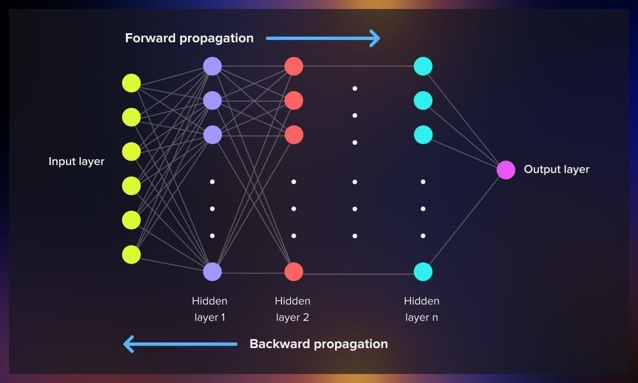

이 방법의 아이디어는 굉장히 간단하다. 출력에 가까운 레이어 (= 깊은 레이어)부터 입력에 가까운 레이어 방향으로, 뒤로Backward 이동하면서 한 번에 하나의 레이어에 대해 손실 기울기를 계산하는 것이다. 이렇게 하면, 깊은 레이어에서 계산한 손실 기울기를 **재사용**함으로써 연산량을 감소시킬 수 있다!

다음의 예로 확인해보자.

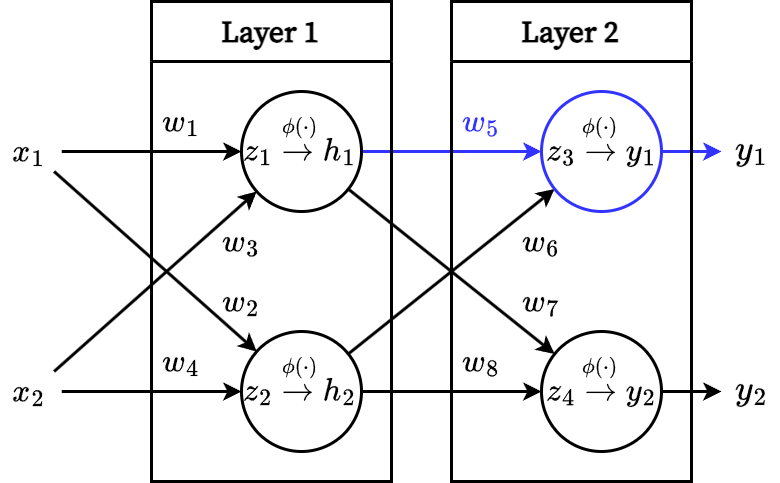

먼저, 레이어 2에 존재하는 $w_5$부터 업데이트 해보겠다. $w_5$에 대한 손실 기울기 $\nabla_{w_5} J(\mathbf{w})$는 미분의 Chain Rule로 다음과 같이 계산할 수 있다:
$$\begin{aligned}\nabla_{w_5} J(\mathbf{w}) &= \frac{\partial}{\partial w_5} J(\mathbf{w}) \\
&= \frac{\partial J(\mathbf{w})}{\partial y_1}\frac{\partial y_1}{\partial z_3} \frac{\partial z_3}{\partial w_5}\\
&= \frac{\partial J(\mathbf{w})}{\partial y_1}\frac{\partial y_1}{\partial z_3} h_1 \quad \because \quad z_3 = h_1\cdot w_5
\end{aligned}$$

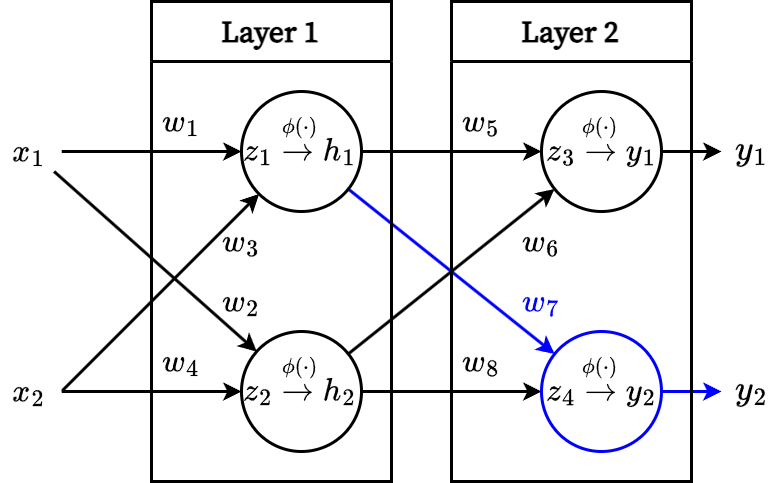

같은 요령으로, 역시 레이어 2에 존재하는 $w_7$에 대한 손실 기울기를 다음처럼 구할 수 있다.

$$\begin{aligned}\nabla_{w_7} J(\mathbf{w}) &= \frac{\partial}{\partial w_7} J(\mathbf{w}) \\
&= \frac{\partial J(\mathbf{w})}{\partial y_2}\frac{\partial y_2}{\partial z_4} \frac{\partial z_4}{\partial w_7}\\
&= \frac{\partial J(\mathbf{w})}{\partial y_2}\frac{\partial y_2}{\partial z_4} h_1 \quad \because \quad z_4 = h_1 \cdot w_7\\
\end{aligned}$$

이렇게 Layer 2에 존재하는 모든 매개변수 ($w_5, w_6, w_7, w_8$)에 대한 손실 기울기를 구하고 나면, 이제는 Layer 1에 존재하는 매개변수에 대한 손실 기울기를 구하는 것이다. 예를 들어, 매개변수 $w_1$에 대한 손실 기울기를 구해보자.

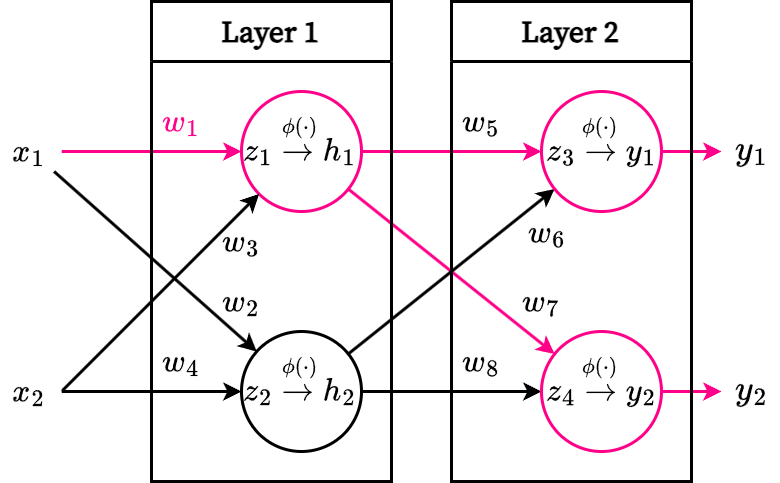

$$\begin{align}\nabla_{w_1} J(\mathbf{w}) &= \frac{\partial}{\partial w_1} J(\mathbf{w}) \\
&= \frac{\partial J(\mathbf{w})}{\partial h_1}\frac{\partial h_1}{\partial z_1} \frac{\partial z_1}{\partial w_1}\\
&= \bigg(\frac{\partial J(\mathbf{w})}{\partial y_1}\frac{\partial y_1}{\partial z_3}\frac{\partial z_3}{\partial h_1}  + \frac{\partial J(\mathbf{w})}{\partial y_2}\frac{\partial z_4}{\partial y_2} \frac{\partial z_4}{\partial h_1}  \bigg) \frac{\partial h_1}{\partial z_1}  \frac{\partial z_1}{\partial w_1} \\
&= \bigg( \color{red}{\frac{\partial J(\mathbf{w})}{\partial y_1}\frac{\partial y_1}{\partial z_3}}w_5  + \color{blue}{\frac{\partial J(\mathbf{w})}{\partial y_2}\frac{\partial y_2}{\partial z_4}} w_7  \bigg) \frac{\partial h_1}{\partial z_1}x_1  \quad \because \quad z_3 = h_1 \cdot w_5,~ z_4 = h_1 \cdot w_7, ~ z_1 = x_1 \cdot w_1\\
\end{align}$$

세 번째 줄과 같이 수식이 확장된 이유는 $h_1$이 출력 $y_1$과 $y_2$ 모두에게 관여하기 때문이다.

하지만 우리가 집중해야 하는 것은 그게 아니라 빨간색과 파란색으로 표시된 수식이다. 우린 이미 저 값을 구한 적이 있다. 바로, 레이어 2에서 매개변수 $w_5$와 $w_7$의 손실 기울기를 구할 때 말이다.

$$\begin{aligned}
\nabla_{w_5} J(\mathbf{w}) &= \color{red}{ \frac{\partial J(\mathbf{w})}{\partial y_1}\frac{\partial y_1}{\partial z_3}} h_1\\
\nabla_{w_7} J(\mathbf{w}) &= \color{blue}{ \frac{\partial J(\mathbf{w})}{\partial y_2}\frac{\partial y_2}{\partial z_4}} h_1\\
\end{aligned}$$

이처럼, 얕은 레이어의 손실 기울기를 구할 때는 깊은 레이어에서 이미 구한 손실 기울기를 재사용할 수 있으며, 따라서 연산량을 획기적으로 감소시킬 수 있다!

물론, 이렇게 복잡하게 미분을 하긴 했으나, 실제로 구현할 때는 미분 값을 직접 구할 필요는 없다. Keras에서 이미 내부적으로 다 구해주기 때문이다. 우리가 해야할 것은 [keras.losses](https://keras.io/api/losses/#loss-class) 패키지 내에 구현된 손실 함수 중 하나를 택해서 모델의 [compile](https://keras.io/api/models/model_training_apis/#compile-method) 함수의 *loss* 인자로 넘겨주기만 하면 된다.이미 굉장히 많은 손실 함수가 구현되어 있으며, 아래와 같은 손실 함수가 대표적으로 활용된다:
* [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class): 레이블이 이산적이며 3개 이상의 값인 분류 과업에서 활용
* [BinaryCrossentropy](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class): 레이블이 이산적이며 0 또는 1인 분류 과업에서 활용
* [MeanSquaredError](https://keras.io/api/losses/regression_losses/#meansquarederror-class): 레이블이 연속적인 회귀 과업에서 활용

그럼, 아래와 같이 손실 함수를 정의해보자.

In [ ]:
from tensorflow import keras


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy()
)

# Practice: Fashon MNIST

그럼, 실제로 이미지 인식을 하는 인공 신경망을 직접 만들어보자. 이미지로는 사진으로 된 옷을 분류하는 [Fasion MNIST](https://keras.io/api/datasets/fashion_mnist/)를 써보겠다.

## Data Preparation

먼저 데이터를 준비해보자. 다행히, 이미 Keras에는 여러 가지 예제 데이터를 [keras.datasets](https://keras.io/api/datasets/) 패키지 내에 기본적으로 제공하고 있다. Fashion MNIST 데이터는 [keras.datasets.fashion_mnist.load_data()](https://keras.io/api/datasets/fashion_mnist/)로 가져올 수 있다.

In [14]:
from tensorflow import keras
import numpy as np


(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 0 ~ 255사이의 색상 값을 0 ~ 1로 바꿔주겠다.
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}; y_train.shape: {y_test.shape}')
#print(X_train[0,5])
np.unique(y_train)

X_train.shape: (60000, 28, 28); y_train.shape: (60000,)
X_test.shape: (10000, 28, 28); y_train.shape: (10000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

위에서 볼 수 있듯이, 28 X 28로 된 이미지 데이터이며, 각 값은 해당하는 픽셀의 흑백 값을 의미한다. 각 이미지에 대해 우리가 원하는 출력값인 레이블은 0부터 9까지의 숫자로 되어 있으며, 각각은 다음을 의미한다:

|Label|Description|
|--|--|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

또한, 데이터가 두 종류로 나뉘어져 있는 것을 확인할 수 있다. 하나는 **훈련 데이터Training Data**인 *(X_train, y_train\)* 로 신경망을 훈련하는 데 사용되는 데이터다. 또 다른 데이터는 **검증 데이터Test Data**인 *(X_test, y_test\)* 로, 훈련에 사용되지 않았으며 훈련된 신경망의 성능을 평가하기 위한 데이터다.

왜 이렇게 데이터를 두 종류로 나눌까? 우리가 학습 모델을 훈련시키고 실제 서비스 등에 탑재하는 시나리오를 생각해보자. 일단, 먼저 우리는 데이터를 가능한 많이 모아서 모델을 훈련시킬 것이다. 그렇게 훈련된 모델을 어떤 서비스에 탑재를 하고 실시간으로 입력 데이터를 분류한다고 가정해보자. 이 때 취득되는 입력 데이터는 훈련 데이터에는 없는, **알지 못하는 데이터**이다. 당연히 우리가 원하는 것은 알지 못하는 데이터에 대해서도 **잘 동작하는 것**일 것이다. 그럼, 우리의 모델이 알지 못하는 데이터에 대해서 잘 동작하는 것은 어떻게 알 수 있을까? 당연히, 실제로 모델을 알지 못하는 데이터에 대해 적용시켜보지 않는 이상은 모른다.

그 대신 알지 못하는 데이터에 대해서 우리의 모델이 어떻게 동작할 지 **추정**은 해볼 수 있다. 바로, 우리가 수집한 데이터를 훈련 데이터와 검증 데이터로 나눠서, 훈련 데이터로는 모델을 훈련시키고, 검증 데이터로는 훈련된 모델의 성능을 측정하는 것이다. 이 때, 검증 데이터는 모델의 훈련에 사용되지 않았으므로 **알지 못하는 데이터**와 완전히 같진 않겠으나 유사하다.

이처럼, 데이터를 나누어서 알지 못하는 데이터에 대한 모델의 성능을 추정하는 방법을 **교차 검증Cross-Validation**이라고 한다.

그럼, 다음과 같이 일부 데이터만 시각화해보겠다.

NameError: name 'X_train' is not defined

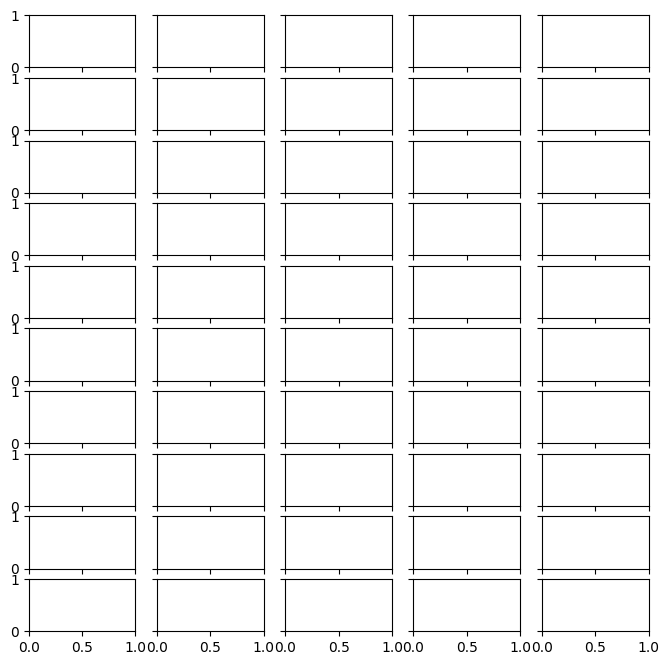

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig, ax = plt.subplots(10, 5, figsize=(8, 8), sharex=True, sharey=True)
for i in range(10):
    data = X_train[y_train == i][:5]
    for j in range(5):
        ax[i, j].imshow(data[j], cmap='gray_r', vmin=0, vmax=1)
        ax[i, j].axis('off')
        if j == 0:
            ax[i, j].set_title(label[i])

fig.tight_layout(pad=0.1)
plt.show()

안타깝게도, 지금까지 배운 방법으로는 28 X 28 이미지를 직접적으로 다룰 수 없다. 일반적인 인공 신경망으로 이러한 데이터를 다루기 위해서는 **각 이미지를 펼쳐서Flatten** 784 차원 (= 28 X 28) 데이터로 바꿔줘야 한다.

다음을 실행해서 이미지를 한 줄로 펼치자.

In [ ]:
X_train_1D, X_test_1D = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print(X_train_1D.shape)
print(X_test_1D.shape)

(60000, 784)
(10000, 784)


## Building Artificial Neural Network

그럼, 이제 784차원 입력 벡터를 받아서 어떤 패션 용품인지를 인식하는 인공 신경망을 만들어보자. 다음 그림처럼 총 3개의 레이어로 구성된 신경망을 만들어보겠다.

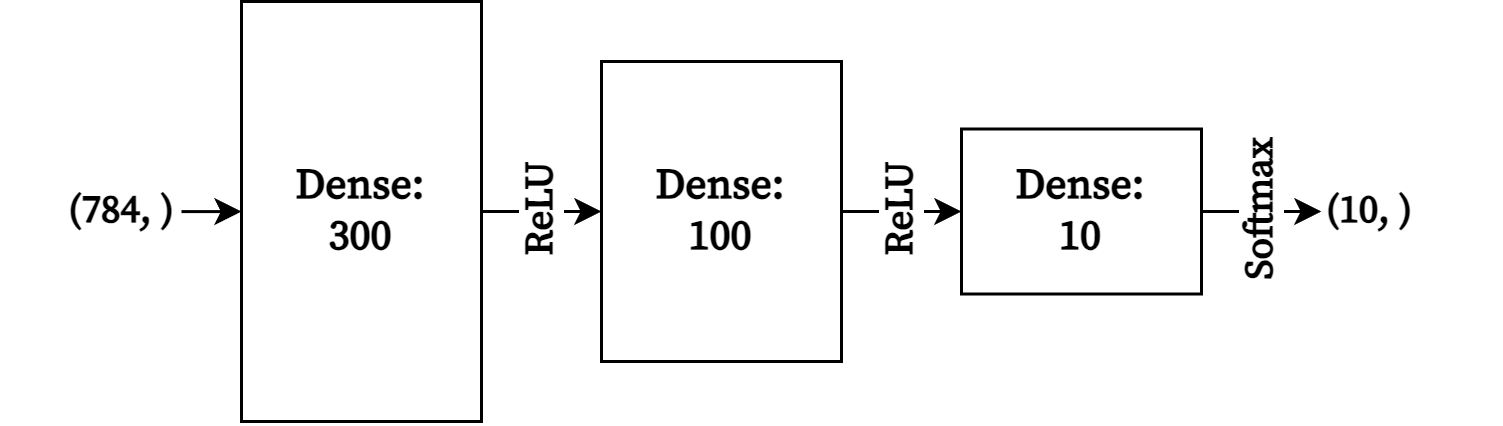

In [ ]:
from tensorflow import keras


model = keras.models.Sequential([
    keras.layers.Input(
        shape=(784, ) # 784차원 입력을 받는다.
    ),
    keras.layers.Dense(
        units = 300, # 첫 번째 레이어에는 300개의 퍼셉트론을 포함한다.
        activation=keras.activations.relu # 활성 함수로는 ReLU를 쓰겠다.
    ),
    keras.layers.Dense(
        units = 100, # 두 번째 레이어에는 100개의 퍼셉트론을 포함한다.
        activation=keras.activations.relu # 활성 함수로는 ReLU를 쓰겠다.
    ),
    keras.layers.Dense(
        units = 10, # 마지막 레이어에는 10개의 퍼셉트론을 포함한다.
        activation=keras.activations.softmax # 마지막 레이어의 활성 함수로는 Softmax를  쓰겠다.
    )
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

입력이나 첫/두 번째 레이어는 우리가 지금까지 했던 것에서 *units* 인자만 바꾼 것에 불과하다. 하지만, 마지막 레이어는 *units* 뿐만 아니라 위에서 다루지 않았던 새로운 활성 함수를 사용한다. 바로 Softmax ([keras.activations.softmax](https://keras.io/api/layers/activations/#softmax-function))이다. 주어진 레이어에 퍼셉트론이 $K$개가 있고, $i$번째 퍼셉트론의 가중 입력합을 $z_i$라고 한다면, 이에 대한 Softmax 값은 다음과 같이 정의된다:

$\begin{aligned}\phi(z_i) = \frac{ \exp [z_i]}{\sum_{j=1}^K \exp[z_j] }\end{aligned}$

Softmax는 인공 신경망의 모델이 내는 출력값이 $i$번째 레이블에 속할 **확률**을 나타낸다. Fashion MNIST 데이터는 총 0부터 9까지 총 10개의 레이블이 있으므로, 마지막 레이어의 퍼셉트론의 갯수 *units*를 10으로 설정하고, 입력 이미지가 각 레이블에 해당할 확률을 출력하도록 했다.

## Loss Function

이제 손실 함수를 정의하자. 손실 함수로는 입력 데이터를 0에서 9사이의 이산적인 레이블로 구분하는 것이니 [SparseCategoricalCrossentropy](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class)를 쓰면 된다.

In [ ]:
from tensorflow import keras


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy()
)

## Training

이제 훈련할 시간만 남았다. Keras로 구현된 모델을 훈련하기 위해서는 모델의 [fit](https://keras.io/api/models/model_training_apis/#fit-method) 함수에다가 데이터를 넘겨주기만 하면 된다. 단 이 때, 고려해야할 사항이 두 가지가 있다.

인공 신경망은 기본적으로 훈련시켜야 하는 매개변수가 굉장히 많다. 위의 신경망만 해도 266,610개의 매개변수가 있으니 말이다. 따라서, 전체 데이터를 한 번만 확인해서는 매개변수를 제대로 훈련할 수가 없고, 전체 데이터를 여러 번 반복하여 확인하면서 매개변수를 훈련해야 한다. 이처럼, 전체 데이터를 확인하는 횟수를 **에폭epoch** 이라고 하며, *epochs* 인자로 설정할 수 있다. 당연히, 에폭의 값이 클 수록 많이 데이터를 반복하여 확인하고, 매개변수를 더욱 많이 훈련하므로 성능이 좋아진다.

또한, 앞서서 말했듯이 매개변수를 훈련하기 위해서는 손실 기울기를 구해야하고, 당연히 그를 위해서는 손실 함수의 값 또한 구해야 한다. 이 때, 데이터 하나 하나마다 손실 함수의 값과 손실 기울기를 구한다면? FasionMNIST 데이터의 경우 60,000개이므로 60,000번이나 계산을 해야한다. 당연히 비효율적이다. 반대로, 전체 데이터에 대해 손실 함수의 값과 손실 기울기를 구하면 어떨까? 계산량은 적어지겠지만 매개변수가 업데이트 되는 빈도가 굉장히 적어지고, 따라서 결과적으로는 많은 에폭을 반복해야 훈련이 될 것이다. 따라서, 보통 인공 신경망에서는 여러 개의 데이터를 한번에 묶어서 손실 함수의 값과 손실 기울기를 구한다. 이렇게 묶은 데이터를 **미니 배치Mini-batch** 라고 한다.

이번 실습에서는 에폭은 *10*, 미니 배치는 *32*로 설정해서 훈련하겠다. 다만, 다른 숫자를 넣더라도 상관은 없다.

In [ ]:
from tensorflow import keras


model.fit(
    x=X_train_1D, # 입력 데이터
    y=y_train, # 레이블 데이터
    batch_size=32, # 미니배치 크기
    epochs=50, # 에폭 수
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6237
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3911
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3560
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3416
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3331
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3258
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3261
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3138
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3071
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3009
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3065
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3014
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2928
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2975
Epoch 15/50
1875/1875 ━━━━━━━

보다시피 에폭이 증가할수록 점점 손실 함수의 값 (*loss*)이 감소하는 것을 알 수 있다.

## Performance

그럼, 이렇게 훈련된 모델로 실제로 예측을 해보도록 하자. 앞서서 FashionMNIST 데이터를 훈련 데이터 (*X_train, y_train*)와 검증 데이터 (*X_test, y_test*) 로 나눈 것을 기억할 것이다. 우리의 모델은 훈련 데이터로 훈련된 것이므로, 당연히 훈련 데이터에 대해서는 잘 동작할 것이다 (위에서 손실 함수의 값 *loss*가 계속 감소한 것을 기억하자).

그럼, 훈련에 사용되지 않은 검증 데이터에 대해서는 어떻게 동작할까? 이를 위해서는 검증 데이터에 존재하는 입력 데이터 *X_test_1D*에 대해서 훈련된 모델이 예측하는 레이블 값과 실제 참인 레이블 값인 *y_test*을 비교해야 한다.

먼저, 검증 데이터의 입력에 대한 모델의 출력값을 모델의 [predict](https://keras.io/api/models/model_training_apis/#predict-method) 함수를 활용하여 다음과 같이 가져오고, 첫 5개 행의 결과만 출력해보자.

In [ ]:
y_prob = model.predict(x=X_test_1D)
y_prob[:5, ]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0000000e+00, 5.1161407e-42, 0.0000000e+00, 1.6815582e-44,
        0.0000000e+00, 6.1172642e-08, 0.0000000e+00, 3.5965105e-08,
        1.6114932e-42, 9.9999988e-01],
       [1.7663955e-19, 0.0000000e+00, 1.0000000e+00, 1.9730282e-42,
        7.6908725e-17, 0.0000000e+00, 3.0258643e-15, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0278191e-01, 0.0000000e+00, 2.2819828e-05, 4.1447443e-08,
        2.2436777e-10, 0.0000000e+00, 8.9719528e-01, 0.0000000e+00,
        7.7175374e-16, 0.0000000e+00]], dtype=float32)

보다시피, 우리의 인공 신경망은 10개의 열을 출력한다. 왜냐하면, 앞서 말한대로 출력 레이어의 활성 함수로 Softmax를 활용했고, 이는 각 레이블 값의 **확률**을 출력하는 것이기 때문이다.

확률은 사실 직관적인 값이 아니다. 대신, 10,000개의 검증 데이터 중에 레이블 값을 정확하게 맞추었는지 확인해보자. 그러기 위해 위에서 제시된 확률 값을 레이블 값으로 바꿔야 한다. 방법은 간단하다. 그냥, 확률이 가장 높은 열의 인덱스를 반환$\arg \max$하면 되는 것이다. 여러가지 방법이 있는데, 여기서는 Keras의 각종 연산자가 들어있는 [keras.ops](https://keras.io/api/ops/) 패키지 내의 [keras.ops.argmax](https://keras.io/api/ops/numpy/#argmax-function) 함수를 사용해보겠다.

In [ ]:
from tensorflow import keras


y_pred = keras.ops.argmax(
    y_prob, # 앞서 예측한 확률값을 넣는다.
    axis=1 # 매 행 단위로 확률값이 최대인 열의 인덱스를 반환한다.
)
y_pred

<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([9, 2, 1, ..., 8, 1, 5], dtype=int32)>

그럼, 실제로 참인 레이블 값과 우리가 만든 인공 신경망이 예측한 레이블 값이 어떻게 같고 다른지 다음처럼 확인해보자.

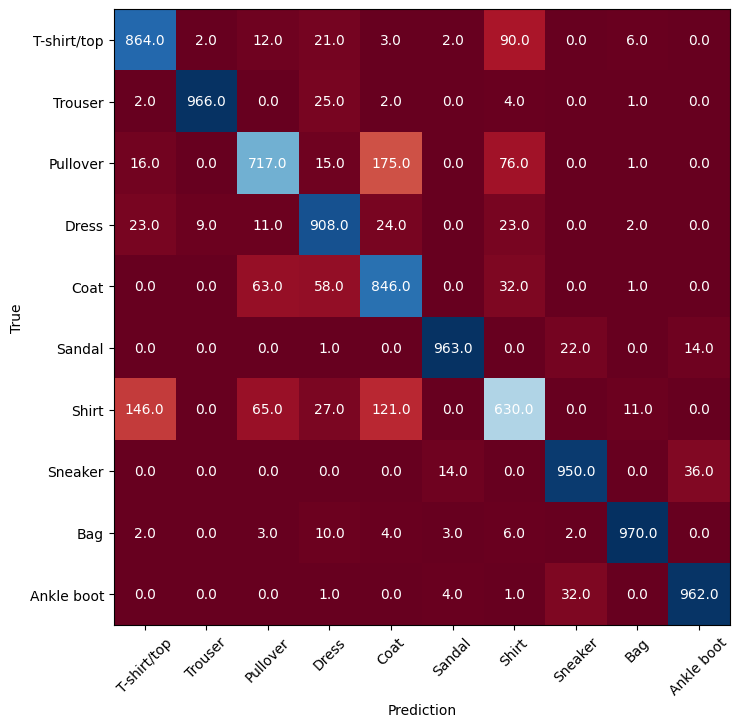

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


conf_matrix = np.zeros((10, 10))

for t, y in zip(y_test, y_pred):
    conf_matrix[t, y] += 1

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(conf_matrix, cmap='RdBu')

ax.set_xticks(range(10), labels=label, rotation=45)
ax.set_yticks(range(10), labels=label)

ax.set_xlabel('Prediction')
ax.set_ylabel('True')

for i in range(10):
    for j in range(10):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')

plt.show()

보다시피, 실제 참인 값과 우리 모델이 예측한 값이 꽤나 잘 맞아떨어지는 것을 (대각선 부분) 확인할 수 있다. 다만, Coat나 Shirt를 예측하는 데 있어서는 조금 성능이 떨어진다. 위처럼, 실제 값과 예측한 값을 행렬 형태로 보여주는 것을 **혼동 행렬Confusion Matrix**라고 한다.

마지막으로, 위의 혼동 행렬의 내용을 딱 떨어지는 하나의 지표로 만들어보자. 바로, 전체 데이터에서 정확하게 맞춘 데이터의 비율을 표시하는 **정확도Accuracy**다.


In [ ]:
import numpy as np

# 정확하게 맞춘 데이터의 갯수
n_correct = np.sum(y_test == y_pred)

# 전체 데이터 갯수
n_total = len(y_test)

n_correct / n_total

np.float64(0.872)

꽤 뛰어나지 않는가?

더 간단하게는 Keras의 성능 지표들을 모아둔 [keras.metrics](https://keras.io/api/metrics) 패키지 내의 [keras.metrics.Accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class)를 활용할 수도 있다.

In [ ]:
from tensorflow import keras


keras.metrics.Accuracy()(
    y_test, # 실제 레이블 값
    y_pred # 예측한 레이블 값
)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8776000142097473>